In [1]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from random import randint

## Load data 

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
len(digits.images)

1797

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Feature & Target 

In [6]:
images = digits.images
target = digits.target

In [7]:
images[:1]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]])

In [8]:
target[:1]

array([0])

In [9]:
images.shape

(1797, 8, 8)

In [10]:
target.shape

(1797,)

Target label : 3 


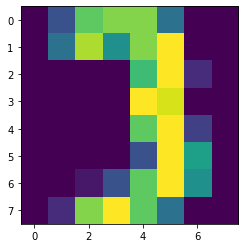

In [11]:
i = randint(0,len(images)-1)
imgplot = plt.imshow(images[i].reshape(8,8))
print(f"Target label : {target[i]} ")

# Modeling

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
images = images.reshape((images.shape[0], -1))

### Holdout method

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(images, target,stratify = target)
# stratify ensures that the train and test sets have approximately the same percentage of samples of each target class as the complete set

#### Choose the best K with a for loop

The best accuracy was with 0.9933333333333333 with k= 9


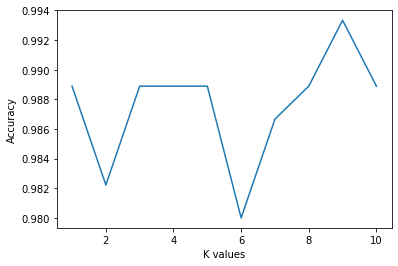

In [15]:
Ks = 10
k=[]
mean_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    k.append(n)
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    predicted = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, predicted)
#mean_acc
plt.plot(k,mean_acc)
plt.xlabel('K values')
plt.ylabel('Accuracy')
best_k = mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "with k=", best_k) 

In [16]:
knn_1 = KNeighborsClassifier(n_neighbors = best_k)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

Compute predictions
label:  6


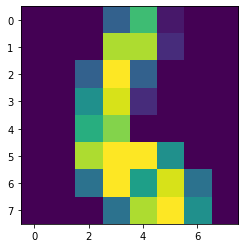

prediction:  [6]


In [17]:
print("Compute predictions")
predicted = knn_1.predict(X_test)
test_img = X_test[5].reshape(8,8)
imgplot = plt.imshow(test_img)
print("label: ",y_test[5])
plt.show()

t = X_test[5].reshape(1,-1)
pred = knn_1.predict(t)
print("prediction: ",pred)

## GridSearchCV - find the optimal value for ‘n_neighbors

In [18]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn_grid_search = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1,Ks+1)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_grid_search, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [20]:
knn_gscv.best_score_

0.9829250185597624

label:  1


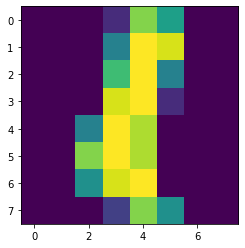

prediction:  [1]


In [21]:
test_img = X_test[4].reshape(8,8)
imgplot = plt.imshow(test_img)
print("label: ",y_test[4])
plt.show()

t = X_test[4].reshape(1,-1)
pred = knn_gscv.predict(t)
print("prediction: ",pred)

## Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = best_k)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(f"cv_scores mean:{np.mean(cv_scores)}")

cv_scores mean:0.9754891156869089


In [24]:
knn_cv.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

label:  6


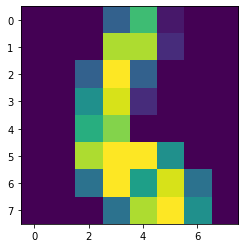

prediction:  [6]


In [25]:
test_img = X_test[5].reshape(8,8)
imgplot = plt.imshow(test_img)
print("label: ",y_test[5])
plt.show()

t = X_test[5].reshape(1,-1)
pred = knn_cv.predict(t)
print("prediction: ",pred)

####  This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.